# Пункт 3 - Проведение расчётов и исследований
В этом ноутбуке представлено решение задач 2-5 из третьего путнкта

In [2]:
import pandas as pd
import numpy as np
from scipy import stats

import matplotlib.pyplot as plt
import seaborn as sns

# Загрузка обработанных данных

In [3]:
data = pd.read_csv(r"../content/processed_data.csv", encoding='cp1251')
data.head()

,развитие_опп,хбп,возраст,пол,гб,сахарный_диабет,стенокардия,инфаркт_миокарда,мерцательная_аритмия,желудочковая_экстрасистолия,...,толщина_паренхимы_почек,аик,количество_шунтов,длительность_операции,длительность_аик,время_пережатия_аорты,объем_кровопотерии,объем_гемотрансфузии,объем_инфузий,диурез
0,нет,Стадия C1-C2,67,1,1,1,1,1,0,0,...,14.0,0,1,150.0,0.0,0.0,200.0,830.0,1200.0,900.0
1,есть,Стадия C1-C2,69,1,1,0,1,0,0,0,...,15.0,1,4,235.0,143.0,48.0,600.0,640.0,900.0,800.0
2,нет,Пациенты без ХБП,50,1,1,0,1,1,0,0,...,17.0,0,1,210.0,0.0,0.0,250.0,0.0,1800.0,500.0
3,нет,Стадия C1-C2,62,1,1,0,1,1,1,0,...,16.0,1,3,210.0,71.0,43.0,500.0,1283.0,1700.0,1700.0
4,есть,Стадия C1-C2,55,1,1,1,1,1,0,0,...,15.0,1,3,265.0,116.0,74.0,500.0,1560.0,1800.0,1300.0


# 3.2 Ввести новый фактор (описать и обосновать выбор фактора и его значений) на основе столбца “Индекс массы тела”. 
*Посчитать количество пациентов, имеющих проблемы с сердцем (выбор перечня проблем должен быть описан и обоснован) для каждой группы. Сделать вывод*


Для столбца "Индекс массы тела" был введен новый фактор "имт_группа". Этот параметр выбран в соответствии с рекомендациями Всемирной организации здравоохранения (ВОЗ) и базируется на следующей интерпретации значений ИМТ[2]:

|Индекс массы тела | Соответствие между массой человека и его ростом|
| ----------- | ----------- |
|16 и менее|	Выраженный дефицит массы тела|
|16—18,5|	Недостаточная (дефицит) масса тела|
|18,5—25|	Норма|
|25—30|	Избыточная масса тела (предожирение)|
|30—35|	Ожирение 1 степени|
|35—40|	Ожирение 2 степени|
|40 и более|	Ожирение 3 степени|

(ссылка на статью в Википедии - https://ru.wikipedia.org/wiki/%D0%98%D0%BD%D0%B4%D0%B5%D0%BA%D1%81_%D0%BC%D0%B0%D1%81%D1%81%D1%8B_%D1%82%D0%B5%D0%BB%D0%B0).

In [ ]:
def _bmi_categorizer(bmi: float) -> str:
    if bmi <= 16.0:
        return "Выраженный дефицит массы тела"
    if bmi < 18.5:
        return "Недостаточная (дефицит) масса тела"
    if bmi < 25:
        return "Норма"
    if bmi < 30:
        return "Избыточная масса тела (предожирение)"
    if bmi < 35:
        return "Ожирение 1 степени"
    if bmi < 40:
        return "Ожирение 2 степени"
    return "Ожирение 3 степени"


data['имт_группа'] = data['имт'].apply(_bmi_categorizer)
data['имт_группа'].head(5)

1. **гб (Гипортоническая болезнь)** - патология сердца и сосудов, проявляющаяся повышением артериального давления
2. **стенокардия** - это болевой синдром в грудной клетке, одно из проявлений ишемической болезни сердца (ИБС)
3. **инфаркт_миокарда** - серде́чный при́ступ возникает из-за полной или частичной блокировки артерии, питающей сердце
4. **мерцательная_аритмия** - нарушение сердечного ритма, характеризующееся хаотическим, нерегулярным сокращением миокарда
5. **желудочковая_экстрасистолия** - нарушение сердечного ритма, характеризующееся хаотическим, нерегулярным сокращением миокарда предсердий
6. **а-в_блокада** - частичное или полное прерывание проведения импульса от предсердий к желудочкам. Наиболее частой причиной является идиопатический фиброз или склероз проводящей системы сердца.
7. **блокада_ножек_пучка_гиса** - нарушение внутрисердечной проводимости, характеризующееся замедлением или полным прекращением проведения импульсов возбуждения по одной или нескольким ветвям пучка Гиса
8. **хсн** (хроническая сердечная недостаточность) - Когда сердце не обеспечивает достаточное кровоснабжение организма, это вызывает отеки и кислородное голодание тканей и внутренних органов.
9. **нк** (недостаточность кровообращения) - синдром, вызванный декомпенсированным нарушением функции миокарда (мышечная ткань сердечного типа)
10. **аик** (наличие аппарата искусственного кровообращения) - когда серце уже не справляется со своими функциями

In [5]:
heart_problem_columns = [
    "гб",
    "стенокардия",
    "инфаркт_миокарда",
    "мерцательная_аритмия",
    "желудочковая_экстрасистолия",
    "а-в_блокада",
    "блокада_ножек_пучка_гиса",
    "хсн",
    "нк",
    "аик",
]

In [6]:
data["имеет_сердечные_проблемы"] = data[heart_problem_columns].any(axis=1)
bpi_grouped_data = data.groupby(["имт_группа", "имеет_сердечные_проблемы"]).size()
bpi_grouped_data

имт_группа                            имеет_сердечные_проблемы
Избыточная масса тела (предожирение)  True                        109
Норма                                 True                         18
Ожирение 1 степени                    True                         56
Ожирение 2 степени                    True                          3
dtype: int64

Можно сказать, что все пациенты имеют сердечные проблемы так или иначе

# 3.3 Зависимость длительности операции от факта перенесенного в прошлом инфаркта миокарда

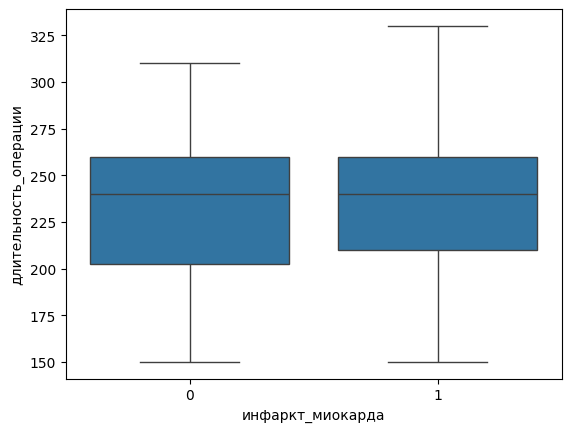

In [19]:
ax = sns.boxplot(x="инфаркт_миокарда", y="длительность_операции", data=data)

Хотя медиана и интерквартальных размах схожи в обоих "ящиках с усами", у второго графика немного выше первый квартиль и более выражен максимум по сравнению с первой графикой. Это указывает, что в целом распределение данных во втором графике смещено немного вверх, но на основе этого нельзя сделать вывод о зависимости длительности операции от факта перенесенного в прошлом инфаркта миокарда

# 3.4 Верно ли, что у пациентов с ИМТ выше нормы будет повышенный уровень холестерина?


Согласно ВОЗ норма ИМТ для человека для человека охватывает значения в пределах от 18,5 до 25. Для выделения пациентов с превышением нормы ИМТ мы сфокусируемся на тех, у кого ИМТ равен или превышает 25.

In [20]:
high_imt = data[data["имт"] >= 25]
low_imt = data[data["имт"] < 25]
print(high_imt["холестерин"].mean(), low_imt["холестерин"].mean(), data['холестерин'].mean())

4.838005952380952 4.92611111111111 4.846532258064515


# 3.5 Верно ли, что даже без хронических болезней почек с возрастом толщина паренхимы почек уменьшается

In [9]:
chronic_illnesses_columns = [
    "сахарный_диабет",
    "гб",
    "хбп",
]

In [10]:
without_chronic_illnesses = data[
    (data["гб"] == 0)
    & (data["сахарный_диабет"] == 0)
    & (data["хбп"] == "Пациенты без ХБП")
]
without_chronic_illnesses[['возраст', 'толщина_паренхимы_почек']]

,возраст,толщина_паренхимы_почек
29,62,18.0
58,61,15.0
75,63,18.0
110,56,17.0


In [12]:
average_thickness_by_age = without_chronic_illnesses.groupby("возраст")["толщина_паренхимы_почек"].mean()
average_thickness_by_age

возраст
56    17.0
61    15.0
62    18.0
63    18.0
Name: толщина_паренхимы_почек, dtype: float64

Количество данных не позволяет нам сделать вывод.